In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
!pip install dataframe_image

In [20]:
import dataframe_image as dsi

from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [21]:
ds=pd.read_csv('PLGW23.csv')

In [68]:
abbrev_teams={'Everton':'EVE', 'Aston Villa':'AVL',
          'Leicester City':'LEI', 'Arsenal':'ARS',
          'Liverpool':'LIV','Tottenham':'TOT', 
          'Chelsea':'CHE', 'Leeds United':'LEE', 
          'Newcastle Utd':'NEW','West Ham':'WHU', 
          'Southampton':'SOU', 'Crystal Palace':'CRY', 
          'Wolves':'WOL','Manchester City':'MCI', 
          'Brighton':'BHA', 'Manchester Utd':'MUN', 
          'West Brom':'WBA','Burnley':'BUR', 
          'Sheffield Utd':'SHU', 'Fulham':'FUL'}

In [23]:
ds.Squad=ds.Squad.apply(lambda x: abbrev_teams[x])

In [24]:
ds['xGpg@h']=ds.xG_h/ds.MP_h #xG per game at home
ds['xGpg@a']=ds.xG_h/ds.MP_a
ds['xGApg@h']=ds.xGA_h/ds.MP_h #xGA per game at home
ds['xGApg@a']=ds.xGA_h/ds.MP_a

In [28]:
ds['GP']=ds.MP_h+ds.MP_a #games played
ds['xG']=ds.xG_h+ds.xG_a #total xG
ds['xGA']=ds.xGA_h+ds.xGA_a #total xGA
ds['delta_xG']=ds.xG-ds.xGA #xG - xGA difference (total home & away)
ds['GS']=ds.GF_a+ds.GF_h #total goals scored
ds['GC']=ds.GA_a+ds.GA_h #total goals conceded
ds['xaG']=ds.GS-ds.xG #GS-xG difference
ds['xaGA']=ds.xGA-ds.GC #xGA - GC difference

# per match
ds['xGpg']=ds.xG/ds.GP
ds['xGApg']=ds.xGA/ds.GP
ds['delta_xGpg']=ds.delta_xG/ds.GP
ds['GSpg']=ds.GS/ds.GP
ds['GCpg']=ds.GC/ds.GP
ds['xaGpg']=ds.xaG/ds.GP
ds['xaGApg']=ds.xaGA/ds.GP

Total Matches : 225
Home Team Win : 83
Draw : 52
Away Team Win : 90


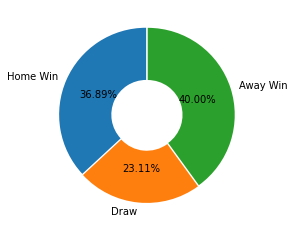

In [30]:
print("Total Matches : {}".format(ds.MP_h.sum()))
print("Home Team Win : {}".format(ds.W_h.sum()))
print("Draw : {}".format(ds.D_h.sum()))
print("Away Team Win : {}".format(ds.L_h.sum()))

X=[ds.W_h.sum(), ds.D_h.sum(), ds.L_h.sum()]

plt.pie(x=X, labels=["Home Win", "Draw", "Away Win"],explode=[0.01,0.01,0.01], startangle=90,autopct='%1.2f%%',wedgeprops={"width":0.6})
plt.savefig('pie_h_vs_a.png')
plt.show()

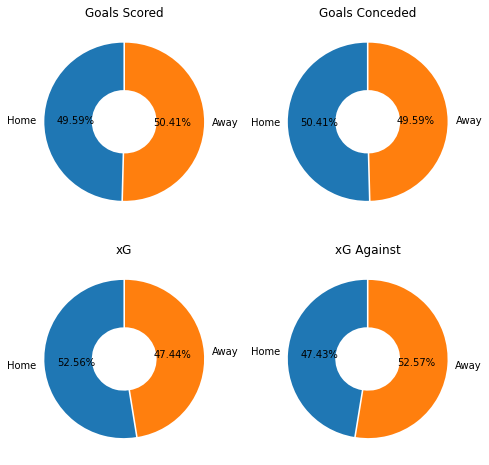

In [32]:
labels=["Home","Away"]
explode=[0.01,0.01]
plt.figure(figsize=(8,8))

#Goals Scored
plt.subplot(221)
plt.title("Goals Scored")
X=[sum(ds.GF_h),sum(ds.GF_a)]
plt.pie(x=X, labels=labels,explode=explode, startangle=90,autopct='%1.2f%%',wedgeprops={"width":0.6})

#Goals Conceded
plt.subplot(222)
plt.title("Goals Conceded")
X=[sum(ds.GA_h),sum(ds.GA_a)]
plt.pie(x=X, labels=labels,explode=explode, startangle=90,autopct='%1.2f%%',wedgeprops={"width":0.6})

#xG 
plt.subplot(223)
plt.title("xG")
X=[sum(ds.xG_h),sum(ds.xG_a)]
plt.pie(x=X, labels=labels,explode=explode, startangle=90, autopct='%1.2f%%',wedgeprops={"width":0.6})

#xG Against
plt.subplot(224)
plt.title("xG Against")
X=[sum(ds.xGA_h),sum(ds.xGA_a)]
plt.pie(x=X, labels=labels,explode=explode, startangle=90, autopct='%1.2f%%',wedgeprops={"width":0.6})
plt.savefig('pie_hvs.a.png')
plt.show()

Average xG per match(Home) : 1.4976742424242424
Average xG per match(Away) : 1.5046060606060607
Average xGA per match(Home) : 1.35
Average xGA per match(Away) : 1.36


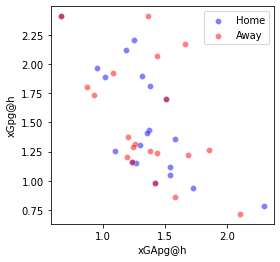

In [36]:
print("Average xG per match(Home) : {}".format(ds['xGpg@h'].mean(), 2))
print("Average xG per match(Away) : {}".format(ds['xGpg@a'].mean(), 2))
print("Average xGA per match(Home) : {}".format(round(ds['xGApg@h'].mean(),2)))
print("Average xGA per match(Away) : {}".format(round(ds['xGApg@a'].mean(),2)))

plt.figure(figsize=(4,4))
sns.scatterplot(data=ds,x='xGApg@h', y='xGpg@h', color='blue', label='Home', alpha=0.5)
sns.scatterplot(data=ds,x='xGApg@a', y='xGpg@a', color='red', label='Away', alpha=0.5)
plt.show()

In [39]:
ds_agg=ds[['Squad','GP', 'xG','xGA', 'delta_xG', 'xGpg', 'xGApg','delta_xGpg']]
ds_agg.sort_values(by='delta_xGpg', ascending=False)

,Squad,GP,xG,xGA,delta_xG,xGpg,xGApg,delta_xGpg
13,MCI,22,49.5,16.4,33.1,2.250000,0.745455,1.504545
4,LIV,23,48.9,28.7,20.2,2.126087,1.247826,0.878261
6,CHE,23,38.6,22.3,16.3,1.678261,0.969565,0.708696
15,MUN,23,43.1,30.0,13.1,1.873913,1.304348,0.569565
1,AVL,21,38.6,28.1,10.5,1.838095,1.338095,0.500000
5,TOT,22,37.6,29.4,8.2,1.709091,1.336364,0.372727
2,LEI,23,36.5,29.4,7.1,1.586957,1.278261,0.308696
9,WHU,23,34.6,29.4,5.2,1.504348,1.278261,0.226087
3,ARS,23,32.7,28.1,4.6,1.421739,1.221739,0.200000
14,BHA,23,33.7,30.5,3.2,1.465217,1.326087,0.139130


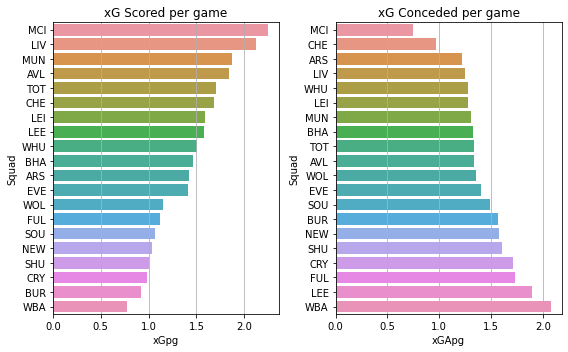

In [40]:
plt.figure(figsize=(8,5))

#xG scored per game for each team
plt.subplot(1,2,1)
plt.title("xG Scored per game")
sns.barplot(orient='h', x='xGpg',y='Squad', data=ds_agg.sort_values(by='xGpg',ascending=False))
plt.grid(which='both', axis='x')

#xGA per game for each team
plt.subplot(1,2,2)
plt.title("xG Conceded per game")
sns.barplot(orient='h', x='xGApg',y='Squad', data=ds_agg.sort_values(by='xGApg',ascending=True))
plt.grid(which='both', axis='x')

plt.tight_layout()
plt.savefig('xGog_xGApg_gbar.png')
plt.show()

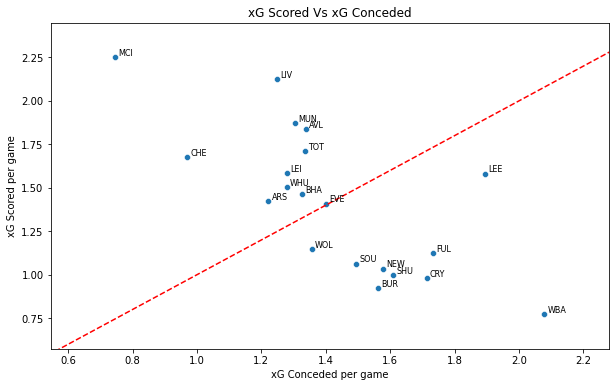

In [44]:
plt.figure(figsize=(10,6))
plt.title("xG Scored Vs xG Conceded")
sns.scatterplot(data=ds_agg, x='xGApg', y='xGpg')
for i in range(ds_agg.shape[0]):
    plt.text(ds_agg.xGApg[i]+0.01, ds_agg.xGpg[i]+0.01, ds_agg.Squad[i], fontdict={'fontsize':8})
plt.xlabel("xG Conceded per game")
plt.ylabel("xG Scored per game")
plt.plot([0,3],[0,3],'r--')
plt.xlim(ds_agg.xGApg.min()-0.2,ds_agg.xGApg.max()+0.2)
plt.ylim(ds_agg.xGpg.min()-0.2,ds_agg.xGpg.max()+0.2)
plt.savefig('scatter_xG_xGA.png')
plt.show()

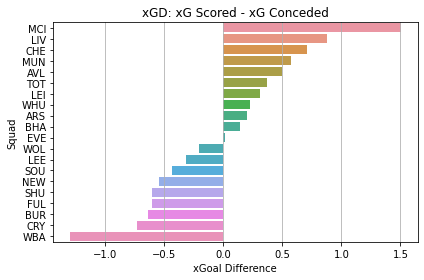

In [46]:
plt.figure(figsize=(6,4))
plt.title("xGD: xG Scored - xG Conceded")
sns.barplot(orient='h', x='delta_xGpg',y='Squad', data=ds_agg.sort_values(by='delta_xGpg', ascending=False))
plt.grid(which='both', axis='x')
plt.xlabel('xGoal Difference')
plt.tight_layout()
plt.savefig('xGD_gbar.png')
plt.show()

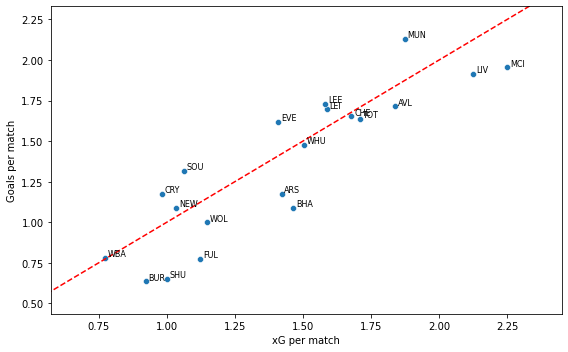

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=ds, x=ds.xGpg, y=ds.GSpg)
for i in range(ds.shape[0]):
    plt.text(x=ds.xGpg[i]+0.01, y=ds.GSpg[i]+0.01, s=ds.Squad[i], fontsize=8)
plt.plot([-3,3],[-3,3],'r--')
plt.xlabel("xG per game")
plt.ylabel("Goals scored per game")
plt.xlim(ds.xGpg.min()-0.2, ds.xGpg.max()+0.2)
plt.ylim(ds.GSpg.min()-0.2, ds.GSpg.max()+0.2)
plt.tight_layout()
plt.savefig('scatter_xG vs GS.png')
plt.show()

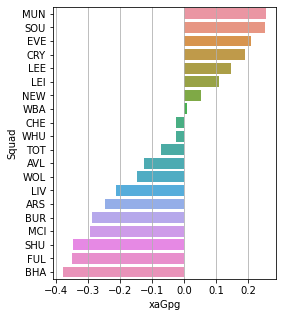

In [48]:
plt.figure(figsize=(4,5))
sns.barplot(orient='h', y='Squad',x='xaGpg',data=ds.sort_values(by='xaGpg', ascending=False))
plt.grid(which='both', axis='x')
plt.savefig('xaGpg_gbar.png')
plt.show()

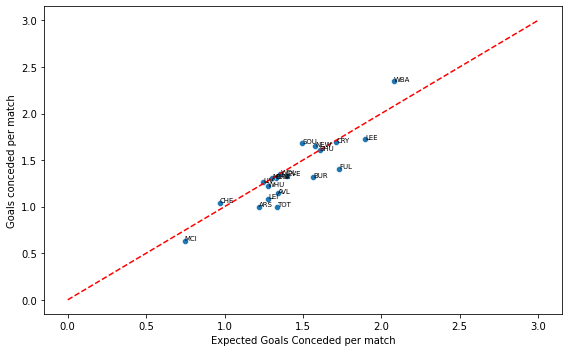

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=ds, x=ds.xGApg, y=ds.GCpg)
for i in range(ds.shape[0]):
    plt.text(x=ds.xGApg[i], y=ds.GCpg[i], s=ds.Squad[i], fontsize=7)
plt.plot([0,3],[0,3],'r--')
plt.xlabel('Expected Goals Conceded per game')
plt.ylabel('Goals conceded per game')
plt.tight_layout()
plt.savefig('scatter_xaGApg.png')
plt.show()

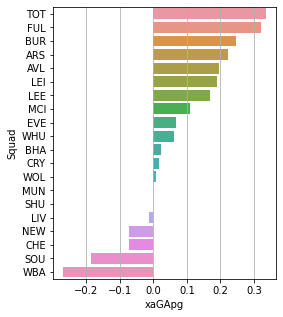

In [51]:
plt.figure(figsize=(4,5))
sns.barplot(orient='h', y='Squad',x='xaGApg',data=ds.sort_values(by='xaGApg', ascending=False))
plt.grid(which='both', axis='x')
plt.savefig('xaGA_gbar.png')
plt.show()

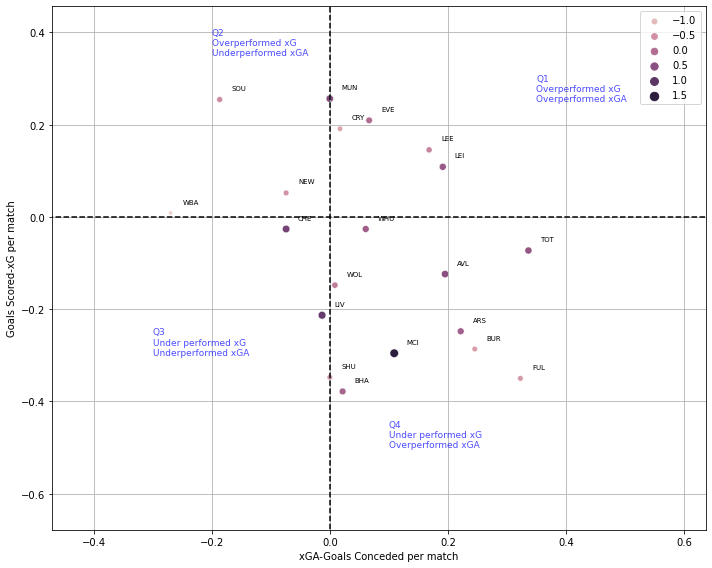

In [58]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='xaGApg', y='xaGpg', data=ds, hue='delta_xGpg',size='delta_xGpg')
plt.grid(which='both')
plt.legend()
plt.plot([5,-5],[0,0], 'k--')
plt.plot([0,0],[5,-5], 'k--')
plt.xlim(ds.xaGApg.min()-0.2,ds.xaGApg.max()+0.3)
plt.ylim(ds.xaGpg.min()-0.3,ds.xaGpg.max()+0.2)
for i in range(ds.shape[0]):
    plt.text(x=ds.xaGApg[i]+0.02, y=ds.xaGpg[i]+0.02,s=ds.Squad[i], fontsize=7)
    
plt.text(x=0.35, y=0.25, s="Q1\nOverperformed xG\nOverperformed xGA", alpha=0.7,fontsize=9, color='blue')
plt.text(x=0.1, y=-0.5, s="Q4\nUnder performed xG\nOverperformed xGA",alpha=0.7,fontsize=9, color='blue')
plt.text(x=-0.2, y=0.35, s="Q2\nOverperformed xG\nUnderperformed xGA",alpha=0.7,fontsize=9, color='blue')
plt.text(x=-0.3, y=-0.3, s="Q3\nUnder performed xG\nUnderperformed xGA",alpha=0.7,fontsize=9, color='blue')
plt.xlabel("xGA-Goals Conceded per game")
plt.ylabel("Goals Scored-xG per game")
plt.tight_layout()
plt.savefig('quadrants.png')
plt.show()

In [78]:
ds_fix=pd.read_csv('PLGW23_fixture.csv')

In [79]:
#Predictions
ds_fix.Home=ds_fix.Home.apply(lambda x: abbrev_teams[x])
ds_fix.Away=ds_fix.Away.apply(lambda x: abbrev_teams[x])

ds_fix['G_home']=0.0
ds_fix['G_away']=0.0

for i in range(ds_fix.shape[0]):
    ds_fix.G_home[i]=(ds_agg.xGpg[ds_agg.Squad==ds_fix.Home[i]].sum()+ ds_agg.xGApg[ds_agg.Squad==ds_fix.Away[i]].sum())/2
    ds_fix.G_away[i]=(ds_agg.xGpg[ds_agg.Squad==ds_fix.Away[i]].sum()+ ds_agg.xGApg[ds_agg.Squad==ds_fix.Home[i]].sum())/2

ds_fix['GD']=ds_fix['G_home']-ds_fix['G_away']
ds_fix['TGS']=ds_fix['G_home']+ds_fix['G_away']
ds_fix=ds_fix.sort_values(by='GD', ascending=False)
df_styled=ds_fix.iloc[:,1:][ds_fix.GW==23].style.background_gradient(cmap='RdYlGn',subset=['GD','TGS']).hide_index()
# dfi.export(df_styled,"mytable.png")
df_styled

Home,Away,G_home,G_away,GD,TGS
MCI,TOT,1.793182,1.227273,0.565909,3.020455
ARS,LEE,1.658597,1.401779,0.256818,3.060375
BHA,AVL,1.401656,1.582091,-0.180435,2.983747
LEI,LIV,1.417391,1.702174,-0.284783,3.119565
WBA,MUN,1.039130,1.976087,-0.936957,3.015217


In [80]:
ds_result=pd.read_csv("PLGW23_result.csv")
ds_result=ds_result[ds_result.GW==23]

#Name Preprocess
ds_result.Home=ds_result.Home.apply(lambda x: abbrev_teams[x])
ds_result.Away=ds_result.Away.apply(lambda x: abbrev_teams[x])
ds_result.head()

,GW,Home,Away,act_xG_Home,act_xG_Away,act_G_Home,act_G_Away
0,23,LEI,LIV,2.07,1.68,3,1
1,23,MCI,TOT,2.46,0.42,3,0
2,23,BHA,AVL,2.33,0.14,0,0
3,23,WBA,MUN,0.95,0.42,1,1
4,23,ARS,LEE,2.51,0.77,4,2


In [82]:
ds_result['Match']=ds_result.Home+" Vs "+ds_result.Away
ds_result["act_GD"]=ds_result.act_G_Home-ds_result.act_G_Away
ds_result["act_xGD"]=ds_result.act_xG_Home-ds_result.act_xG_Away

ds_result["pred_xG_Home"]=ds_result.Home\
.apply(lambda x:ds_fix.G_home[ds_fix.Home==x][ds_fix.GW==23].sum())
ds_result["pred_xG_Away"]=ds_result.Home\
.apply(lambda x:ds_fix.G_away[ds_fix.Home==x][ds_fix.GW==23].sum())
ds_result["pred_xGD"]=ds_result.Home\
.apply(lambda x:ds_fix.GD[ds_fix.Home==x][ds_fix.GW==23].sum())

In [83]:
ds_result.head()


,GW,Home,Away,act_xG_Home,act_xG_Away,act_G_Home,act_G_Away,Match,act_GD,act_xGD,pred_xG_Home,pred_xG_Away,pred_xGD
0,23,LEI,LIV,2.07,1.68,3,1,LEI Vs LIV,2,0.39,1.417391,1.702174,-0.284783
1,23,MCI,TOT,2.46,0.42,3,0,MCI Vs TOT,3,2.04,1.793182,1.227273,0.565909
2,23,BHA,AVL,2.33,0.14,0,0,BHA Vs AVL,0,2.19,1.401656,1.582091,-0.180435
3,23,WBA,MUN,0.95,0.42,1,1,WBA Vs MUN,0,0.53,1.039130,1.976087,-0.936957
4,23,ARS,LEE,2.51,0.77,4,2,ARS Vs LEE,2,1.74,1.658597,1.401779,0.256818


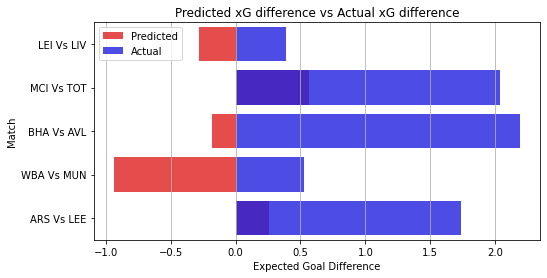

In [84]:
plt.figure(figsize=(8,4))
plt.title("Predicted xGD vs Actual xGD")
sns.barplot(y='Match', x='pred_xGD', orient='h',data=ds_result, color='red', alpha=0.8, label="Predicted")
sns.barplot(y='Match', x='act_xGD', orient='h', data=ds_result, color='blue', alpha=0.8, label="Actual")
plt.xlabel("Expected Goal Difference")
#plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.grid(axis='x')
plt.savefig('result_Predicted xG difference vs Actual xG difference.png')
plt.show()

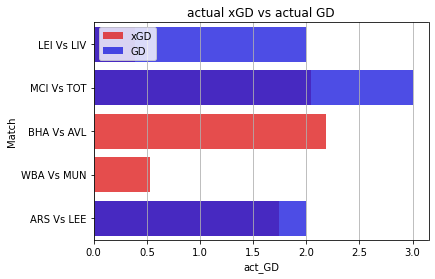

In [87]:
plt.figure(figsize=(6,4))
plt.title("Actual xGD vs Actual GD")
sns.barplot(y='Match', x='act_xGD', orient='h',data=ds_result, color='red', alpha=0.8, label="xGD")
sns.barplot(y='Match', x='act_GD', orient='h', data=ds_result, color='blue', alpha=0.8, label="GD")

plt.legend(loc="upper left")
plt.grid(axis='x')
plt.savefig('result_Actual xGD vs Actual GD.png')

plt.show()

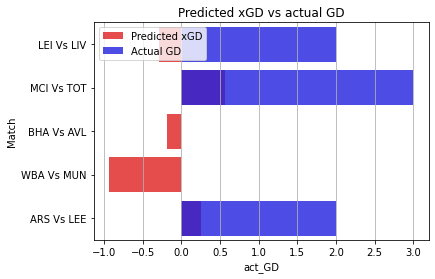

In [88]:
plt.figure(figsize=(6,4))
plt.title("Predicted xGD vs Actual GD")
sns.barplot(y='Match', x='pred_xGD', orient='h',data=ds_result, color='red', alpha=0.8, label="Predicted xGD")
sns.barplot(y='Match', x='act_GD', orient='h', data=ds_result, color='blue', alpha=0.8, label="Actual GD")
#plt.ylabel("Expected Goal Difference")
#plt.xticks(rotation=90)
plt.legend(loc="upper left")
plt.grid(axis='x')
plt.savefig('result_Predicted xGD vs Actual GD.png')

plt.show()